**IUT d'Orléans - Année 2022-2023- BUT1\
R2.07 Graphes**

# TP3 : Parcours en Profondeur et en largeur - Animations

## Parcours en profondeur avec une pile et animation
Nous allons d'abord ré-implémenter le **parcours en profondeur (DFS)** vu en cours et lors du TP2. La première partie de ce tp consiste à mettre en place les fonctions nécessaires pour la gestion de la pile ainsi que quelques sous-fonctions utiles au parcours. Puis nous implémenterons l'algorithme du DFS avant de visualiser le déroulement de l'algorithme. 

### Implémentation de la pile

On rappelle que la pile est une structure de données de type "Last In Last Out": le dernier élément ajouté à la pile sera également le premier auquel on peut accéder. La pile fournit trois primitives:

- <code>pile_sommet(P)</code> qui permet d'accéder à l'élément en haut de la pile P
- <code>pile_depiler(P)</code> qui permet de retirer l'élément au sommet de la pile P. Cette fonction doit renvoyer cette élément.
- <code>pile_empiler(P,x)</code> qui permet d'ajouter un élément x au sommet de la pile P.

En utilisant les listes python, proposez une implémentation d'une pile avec les primitives suivantes.

In [5]:
# Gestion de la pile
# A compléter

def stack_init():
    return []

def stack_top(S):
    return S[-1]

def stack_pop(S):
    return S.pop()

def stack_push(S,u):
    S.append(u)

### Fonctions utilitaires

Nous allons maintenant implémenter plusieurs fonctions qui nous seront utiles pour le DFS. Avant tout, pensez à exécuter la cellule suivante pour importer les bibliothèques nécessaires.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

Répondez maintenant aux questions suivantes:
1. Ecrivez une fonction <code>initialisation(G,u)</code> qui associe à tout sommet du graphe, sauf u, un attribut <code>couleur</code> initialisé à "white". Le sommet u aura quand à lui la couleur "red". Chaque arête du graphe sera quand à elle associée à la couleur "black". Tout sommet du graphe a aussi un atibut *father* initialisé à *None*.

In [26]:
# Initialisation du graphe avec des noeuds 'white' et le noeu de départ "red"
def graph_init(G,u):
    for v in G.nodes:
        G.nodes[v]["color"] = "white"
        G.nodes[v]["father"] = None
    for u, v in G.edges:
        G.edges[(u,v)]["color"] = "black"
        G.nodes[u]["color"] = "red"

In [27]:
G0 = nx.Graph()
G0.add_edges_from([(1,2),(2,3),(3,4), (2,5), (2,6)])
graph_init(G0,2)
G0.nodes

NodeView((1, 2, 3, 4, 5, 6))

2. Ecrivez une fonction <code>visiter(G,v,w) </code>  qui associe la couleur "red" à $w$ et met $v$ comme "father" de $w$.

Ecriver une fonction <code>traiter(G,u)</code> qui associe la couleur " green" au sommet u.  

Ecrivez également une fonction <code>arete_arbre(G,v,w)</code> qui associe la couleur "green" à l'arête {v,w}.

In [28]:
def visiter(G,v,w):
    G.nodes[w]["color"] = "red"
    G.nodes[w]["father"] = v

def traiter(G, v):
    G.nodes[v]["color"] = "green"

def arete_arbre(G, v, w):
    G.nodes[v]["color"] = "green"

3. Ecrivez une fonction <code>voisin_blanc(G,u)</code> qui renvoie le premier sommet colorié en blanc dans le voisinage de u.

In [29]:
def voisin_blanc(G, u):
    voisin = None
    for w in G.adj[u]:
        if G.nodes[w]["color"] == "white":
            voisin = w
            return w
    return voisin

4. En utilisant les fonctions écrites précédemment, écrivez une fonction <code>DFS(G,u)</code> implémentant un parcours en profondeur du graphe G en partant du sommet u. On exécutera la fonction en partant du sommet 0.

In [30]:
# Algorithme principal de parcours en profondeur itératif
def DFS(G,u):
    """
    Implémentation de l'algorithme du parcours en profondeur (DFS) en utilisant une pile.
    
    Paramètres:
    G -- le graphe que l'on veut parcourir
    u -- le sommet de départ du parcours
    """
    
    # initialisation
    
    S = stack_init()
    stack_push(S,u)
    graph_init(G,u)
    yield G #  pour l'animation
    visiter(G,None,u)
    
    # boucle principale
    while len(S) > 0:
        yield G #  pour l'animation
        v = stack_top(S)
        w = voisin_blanc(G,v) # on recherche un voisin non visité
        if w != None:
            visiter(G,v,w)
            arete_arbre(G,v,w)
            stack_push(S,w)
        else:
            traiter(G,v)
            stack_pop(S)
        yield G # pour animation

        
        
G = nx.gnp_random_graph(10, 0.3)
graph_init(G,0)
DFS(G,0)



def stack_init():
    return pile_sommet(0)

def stack_top(S):
    return pile_sommet(S)

def stack_pop(S):
    return pile_depiler(S)

def stack_push(S,u):
    pile_empiler(S,u)

def graph_init(G,u):
    for v in G.nodes:
        G.nodes[v]["color"] = "white"
        G.nodes[v]["father"] = None
    for u, v in G.edges:
        G.edges[u,v]["color"] = "black"
        G.nodes[u]["color"] = "red"

def visiter(G,v,w):
    G.nodes[w]["color"] = "red"
    G.nodes[v]["father"] = w

def traiter(G, u):
    G.nodes[u]["color"] = "green"

def arete_arbre(G, v, w):
    G.nodes[v]["color"] = "green"
    G.nodes[w]["color"] = "green"
    
    
def voisin_blanc(G, u):
    voisin = None
    for w in G.adj[u]:
        if G.nodes[w]["color"] == "white":
            return w
    return None

    

In [31]:
G.edges


EdgeView([(0, 1), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 5), (1, 6), (1, 9), (2, 5), (2, 6), (2, 8), (4, 7), (4, 9), (5, 9), (7, 8)])

In [32]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

Ecrivez maintenant une <code>fonction arbre_dfs(G)</code> qui renvoie une liste contenant les arêtes de l'arbre produit par le parcours en profondeur. Une arête sera représentée comme un tuple à deux valeurs.

In [33]:
def tree(G):
    edges = []
    for (u, v) in G.edges:
        if G[u][v].get("color") == "green":  # Use the get() method to avoid KeyError
            edges.append((u, v))
    return edges

In [34]:
# Call the tree function
green_edges = tree(G)
print(green_edges)

[]


### Affichage du graphe

Nous allons maintenant afficher le graphe obtenu après le parcours en profondeur. Pour cela, implémentez tout d'abord deux fonctions <code>couleur_sommets(G)</code> et <code>couleur_arêtes(G)</code> qui renvoient respectivement les couleurs des sommets et des arêtes.

In [35]:
def get_node_color(G):
    colors = []
    for node, color in G.nodes.data("color",default="white"):
        colors.append(color)
    return colors

def get_edge_color(G):
    colors = []
    for x,y, color in G.edges.data("color",default="black"):
        colors.append(color)
    return colors

### Affichage du graphe

Nous allons maintenant afficher le graphe obtenu après le parcours en profondeur. Pour cela, implémentez tout d'abord deux fonctions <code>get_node__color(G)</code> et <code>get_edge_color(G)</code> qui renvoient respectivement les couleurs des sommets et des arêtes.

['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white']
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']


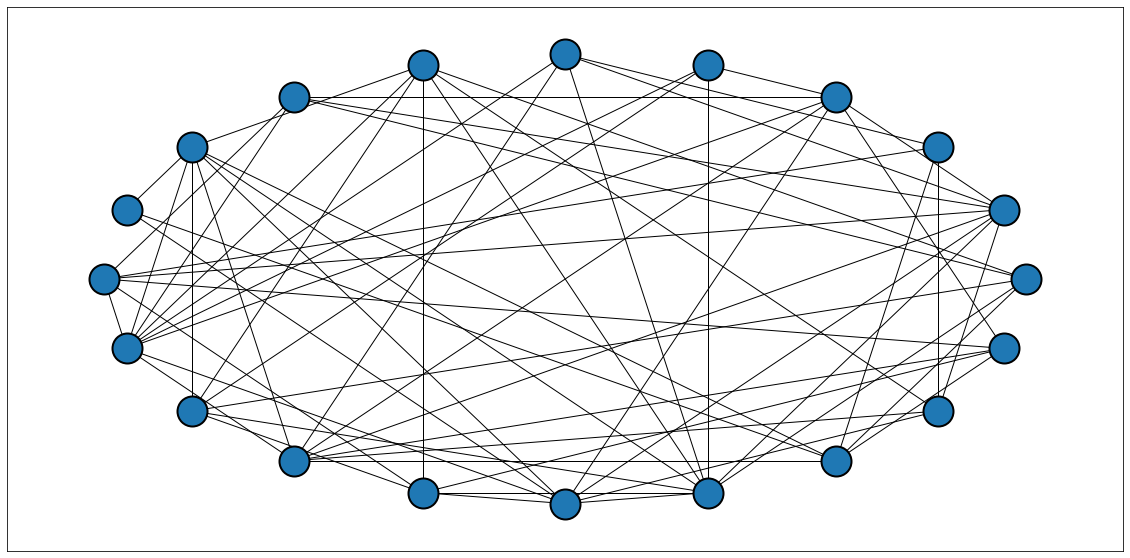

In [36]:
G = nx.gnp_random_graph(20, 0.3)
plt.figure(1,figsize=(20,10))
pos=nx.layout.circular_layout(G)

edges = tree(G)

nx.draw_networkx_nodes(G,pos=pos,node_size=900,edgecolors="black",linewidths=2)
nx.draw_networkx_edges(G,pos=pos,edgelist=G.edges-edges)
nx.draw_networkx_edges(G,pos=pos,edgelist=edges,edge_color="green",width=5)

print(get_node_color(G))
print(get_edge_color(G))

def get_node_color(G):
    colors = []
    for node, color in G.nodes.data("color",default="white"):
        colors.append(color)
    return colors

def get_edge_color(G):
    colors = []
    for x,y, color in G.edges.data("color",default="black"):
        colors.append(color)
    return colors

## Animation

Nous allons maintenant visualiser le déroulement de l'exécution de l'algorithme en créant une animation avec matplotlib. Pour cela il faut tout d'abord transformer la fonction <code>DFS</code> en un générateur en ajoutant le mot clé <code>yield</code> suivi du nom du graphe à chaque fois où une modification du graphe intervient dans le code de la fonction. En suite, il sera nécessaire de modifier la fonction <code>update(G)</code> ci dessous, afin de reprendre le code utilisé pour un affichage classique. La fonction <code>update(G)</code> fera appel au générateur à chaque fenêtre.

In [37]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(1,figsize=(20,10))

G = nx.gnp_random_graph(10, 0.2)
pos=nx.layout.circular_layout(G)
graph_init(G,0)

def update(G):
    nx.draw_networkx_nodes(G,pos=pos,
                     node_size=900,
                     edgecolors="black",
                     node_color=get_node_color(G),
                     linewidths=2,
                    )

    
    # Compléter ici
    
    nx.draw_networkx_edges(G,pos=pos,edgelist=G.edges-edges,edge_color="black")
    nx.draw_networkx_edges(G,pos=pos,edgelist=edges,edge_color="green",width=5)

anim = animation.FuncAnimation(fig, 
                               update, # fonction utilisée à chaque nouvelle fenetre
                               frames=DFS(G,0), # valeurs passées en paramètre à update
                               interval=200, # interval entre deux fenetres (en ms)
                               cache_frame_data=False)

HTML(anim.to_jshtml())



NameError: name 'pile_sommet' is not defined

<Figure size 1440x720 with 0 Axes>

In [38]:
print(G)
for node in G.edges:
    print(node)

Graph with 10 nodes and 10 edges
(0, 6)
(1, 4)
(1, 6)
(1, 8)
(2, 4)
(2, 5)
(4, 6)
(4, 9)
(5, 6)
(6, 8)


### Applications

## Parcours en largeur : Simulation d'incendie
On veut simuler la propagation d’un incendie dans un bâtiment. On représente le bâtiment par un graphe, dont les sommets sont les salles, et une arête entre deux salles indique qu’elles communiquent, et que le feu va se propager de l’une à l’autre. On considère que chaque minute, le feu envahit toutes les salles qui communiquent avec une salle en feu ; les salles qui sont en feu continuent de brûler indéfiniment.

1.	Écrire une fonction *propagation(G,E)* qui, à partir du graphe G et d’un ensemble E de sommets représentant des salles en feu donne l’ensemble F des salles qui seront en feu 1 minute plus tard.
2. Écrire une fonction *propagation2(G,E)* qui, à partir du graphe G et d’un ensemble E de sommets représentant des salles en feu retourne l’ensemble F des **nouvelles salles** qui seront en feu 1 minute plus tard
3.	Écrire une fonction propagationTemps(G,E,t) qui indique quelles salles seront en feu dans t minutes si E est l’ensemble des salles en feu maintenant.
4.	Si une salle est en feu dans le bâtiment, quel est l’ensemble des salles qui prendront feu à un moment ou à un autre ?
5. Représenter graphiquement la propagation du feu à partir d’une salle.
6. Ecrire le parcours en largeur avec une animation.

In [39]:
import networkx as nx

Une minute plus tard ...

In [40]:
# Version 1
def propagation(G,E):
    voisins = set()

    for arete in E:
            for v in G[arete]:
                voisins.add(v)

    print(E)
    print(voisins)
    return voisins|E

In [41]:
# v2 (identique) en une ligne
def propag(G,E):
    return E|{v for S in E for v in G[S]}

Exemple de Graphe

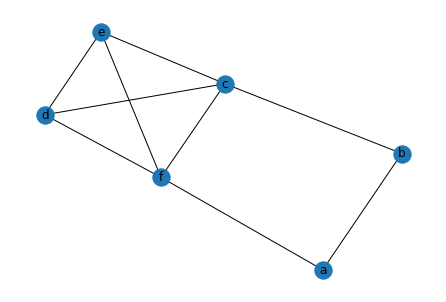

In [42]:
# Exemple de graphe
G1 = nx.Graph()
G1.add_edges_from([("a","f"),("a","b"),("f","c"),("f","e"),("f","d"),("c","e"),("c","b"),("c","d"),("e","d")
])
nx.draw(G1,with_labels=True)

Si le feu démarre de ${a,b}$ :

In [20]:
E = {"a","b"}

In [43]:
propagation(G1,E)

{'b', 'a'}
{'c', 'f', 'a', 'b'}


{'a', 'b', 'c', 'f'}

In [44]:
propag(G1,E)

{'a', 'b', 'c', 'f'}

In [45]:

def propagation2(G, E):
    """
    Renvoie les nouvelles salles qui _prennent_ feu à cause
    des salles de E.
    """
    F = set()
    for salle in E:
        for v in G[salle]:
            if v not in E:F.add(v)
    return F

In [46]:
propagation2(G1,E)

{'c', 'f'}

In [47]:
def propagation_temps(G, E, t):
    en_feu=E
    for i in range(t):
        en_feu = propagation(G,en_feu)
    return en_feu

propagation_temps(G1, E, 1)

{'b', 'a'}
{'c', 'f', 'a', 'b'}


{'a', 'b', 'c', 'f'}

In [48]:
from matplotlib.pyplot import pause

def dessine(G, pos, en_feu, nouvelles, i):
    """
    G est un graphe
    en_feu est l'ensemble des sommets en feu
    nouvelles est l'ensemble des sommets qui vont prendre feu
    pos est le dictionnaire des positions des sommets de G
    pos peut être créé à la main ou obtenu par 
    'nx.spring_layout(G)'position optimal a regarder
    """
    nx.draw(G, pos, with_labels=True, node_color = 'w')
    nx.draw_networkx_nodes(G, pos,\
                           nodelist = en_feu, \
                           node_color = 'r')
    nx.draw_networkx_nodes(G, pos, \
                           nodelist = nouvelles, \
                           node_color = 'orange')
    nx.draw_networkx_labels(G, pos)
    pause(2)

In [49]:
def propagation_graphique(G, E):
    pos = nx.spring_layout(G)
    en_feu = E
    nouvelles = E
    i = 0
    dessine(G, pos, en_feu, nouvelles, i)
    while len(nouvelles) !=0:
        nouvelles = propagation2(G,en_feu)
        en_feu=en_feu|nouvelles
        dessine(G, pos, en_feu, nouvelles, i)
        i+=1
        print(i)
    return en_feu

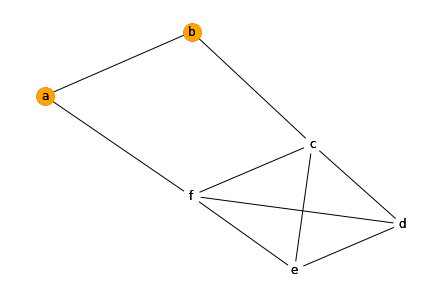

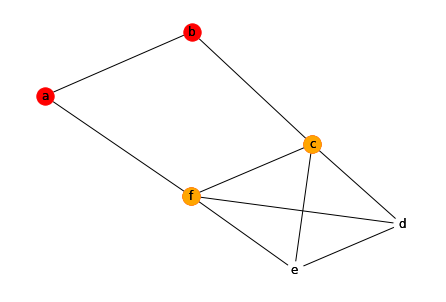

1


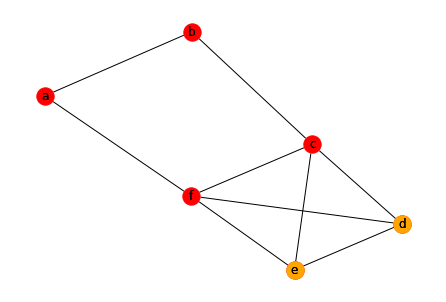

2


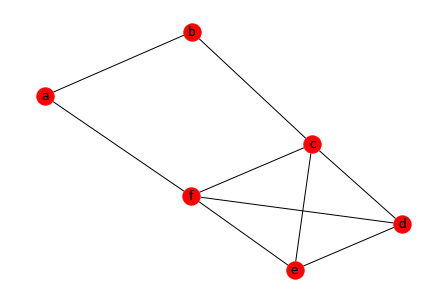

3


{'a', 'b', 'c', 'd', 'e', 'f'}

In [50]:
propagation_graphique(G1, E)

In [ ]:
# Compléter
def parcours_largeur(G, depart):
    pos = nx. spring_layout(G)
    nx.draw(G, pos= pos) 
    deja_vus = {depart}
    aretes = G.edges
    a_explorer = [depart]
    while a_explorer != []: 
        sommet_courant = ??
        nx.draw_networkx_nodes(G, nodelist=list(deja_vus), node_color="red", pos=pos)
        nx.draw_networkx_nodes(G, nodelist= a_explorer , node_color= "blue", pos=pos)
        nx.draw_networkx_nodes(G, nodelist=[sommet_courant], node_color="green", pos=pos)
        #input()
        pause(1)
        a_explorer = a_explorer [1:]
        for nouveau_sommet in G[ sommet_courant]:
            if ??

In [ ]:
import time

# Compléter
def parcours_largeur(G, depart):
    pos = nx.spring_layout(G)
    
    deja_vus = {depart}
    a_explorer = [depart]
    
    while a_explorer != []:
        sommet_courant = ??
        
        # Draw the graph with updated node colors
        plt.clf()
        nx.draw_networkx_edges(G, pos=pos, alpha=0.5)
        nx.draw_networkx_labels(G, pos=pos)
        nx.draw_networkx_nodes(G, nodelist=list(deja_vus), node_color="red", pos=pos)
        nx.draw_networkx_nodes(G, nodelist=a_explorer, node_color="blue", pos=pos)
        nx.draw_networkx_nodes(G, nodelist=[sommet_courant], node_color="green", pos=pos)
        
        plt.draw()
        plt.pause(1)  # Pause for 1 second
        
        a_explorer = ??
        
        for nouveau_sommet in G[sommet_courant]:
            if ??
            
            
G = nx.gnp_random_graph(10, 0.3)
plt.ion()
parcours_largeur(G, 0)
plt.show(block=True)

In [ ]:
# Finaliser l'animation, etc.

In [ ]:
# Retour sur connexité, composantes connexes etc.